## Benchmark of measure_PPI libary
Measuring the speed and outputing the data as csv for later use
Created 2025-01-07

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import numpy as np

In [4]:
libpath = Path("../andreas lib").resolve()
print(libpath)
sys.path.insert(0, str(libpath))
import measure_PPI

D:\Eigene Datein\Programmieren\Git\abrilka\bachelorthesis\andreas lib


In [6]:
structure_basePath = Path("../ressources/ISS AF_DMI_structures").resolve()
structure_folders = [structure_basePath / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3']]
solved_basePath = Path("../ressources/ISS DMI_solved_structures").resolve()
solvedHydrogen_basePath = Path("../ressources/ISS DMI_solved_structures hydrogens").resolve()

#### Benchmark of AF predictions

In [4]:
pathObj = {}

for path in structure_folders:
    measure_PPI.WalkFolder(path, pathObj)

measurement = measure_PPI.Run(list(pathObj.values()))

Found 400 structures
Found 525 structures
Found 445 structures
[2025-01-08 10:29:47,429 | measure_PPI | INFO] Started Taskpool of 12 processes for 1370 files
[2025-01-08 10:29:52,537 | measure_PPI | INFO] 5% - ETA 0:01:24 | current speed 15.487 s⁻¹ | average speed 15.288 s⁻¹
[2025-01-08 10:29:57,541 | measure_PPI | INFO] 14% - ETA 0:00:58 | current speed 24.584 s⁻¹ | average speed 19.921 s⁻¹
[2025-01-08 10:30:02,745 | measure_PPI | INFO] 28% - ETA 0:00:37 | current speed 37.469 s⁻¹ | average speed 25.911 s⁻¹
[2025-01-08 10:30:07,752 | measure_PPI | INFO] 47% - ETA 0:00:22 | current speed 51.725 s⁻¹ | average speed 32.294 s⁻¹
[2025-01-08 10:30:12,767 | measure_PPI | INFO] 60% - ETA 0:00:16 | current speed 35.693 s⁻¹ | average speed 32.968 s⁻¹
[2025-01-08 10:30:17,798 | measure_PPI | INFO] 74% - ETA 0:00:10 | current speed 36.373 s⁻¹ | average speed 33.534 s⁻¹
[2025-01-08 10:30:22,921 | measure_PPI | INFO] 85% - ETA 0:00:06 | current speed 30.06 s⁻¹ | average speed 33.031 s⁻¹
[2025-01-08

In [5]:
#measurement.to_csv(Path("../ressources/af_structures.csv"), index=False)

In [6]:
measurement

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,883.012,4.542,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,889.343,4.559,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,890.493,4.574,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,894.777,4.529,30


#### Sample structure

In [28]:
#Loading sample structure
#sampleStructure_name = "LIG_NRP_CendR_1_2ORZ"
#sampleStructure_path = structure_folders[1] / sampleStructure_name / "ranked_0.pdb"
#sampleStructure_name = "DEG_MDM2_SWIB_1_1YCR"
#sampleStructure_path = structure_folders[0] / sampleStructure_name / "ranked_1.pdb"
#sampleStructure_name = "DEG_Kelch_Keap1_1_2FLU"
#sampleStructure_path = structure_folders[0] / sampleStructure_name / "ranked_4.pdb"
sampleStructure_name = "LIG_APCC_ABBA_1_4BH6"
pdb_id = sampleStructure_name.split("_")[-1]
sampleStructure_path = structure_folders[0] / sampleStructure_name / "ranked_3.pdb"
structure_biopy, atomarray_biotite = measure_PPI.OpenStructure(sampleStructure_path, sampleStructure_name)
solved_biopy, solved_biotite = measure_PPI.OpenStructure(solvedHydrogen_basePath / f"{pdb_id}_min_DMI.pdb", sampleStructure_name)
print(measure_PPI.calculate_min_distance(atomarray_biotite, max_cutoff = 200))
print(measure_PPI.EvaluateStructure(sampleStructure_path, sampleStructure_name))
measure_PPI.EvaluateStructure(solvedHydrogen_basePath / f"{pdb_id}_min_DMI.pdb", sampleStructure_name)

6.172
{'structure_name': 'LIG_APCC_ABBA_1_4BH6', 'file': 'ranked_3.pdb', 'hbonds': 0, 'salt_bridges': 0, 'buried_area': 632.875, 'min_distance': 6.172, 'hydrophobic_interactions': 9}


{'structure_name': 'LIG_APCC_ABBA_1_4BH6',
 'file': '4BH6_min_DMI.pdb',
 'hbonds': 3,
 'salt_bridges': 0,
 'buried_area': 865.969,
 'min_distance': 4.563,
 'hydrophobic_interactions': 25}

#### Benchmark of solved structures
(The adding were already added)

In [8]:
pathObj = {}
measure_PPI.WalkFolder(solvedHydrogen_basePath, pathObj)
measurement_solved = measure_PPI.Run(list(pathObj.values()))

Found 138 structures
[2025-01-08 10:30:28,428 | measure_PPI | INFO] Started Taskpool of 12 processes for 138 files
[2025-01-08 10:30:33,608 | measure_PPI | INFO] 71% - ETA 0:00:02 | current speed 19.254 s⁻¹ | average speed 19.06 s⁻¹
[2025-01-08 10:30:34,314 | measure_PPI | INFO] Finished processing 138 objects in 0:00:05


In [9]:
measurement_solved

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,1ATP_min_DMI,1ATP_min_DMI.pdb,1,0,808.592,6.273,77
1,1AXC_min_DMI,1AXC_min_DMI.pdb,4,0,1209.332,4.174,62
2,1B72_min_DMI,1B72_min_DMI.pdb,1,0,547.149,5.182,36
3,1B8Q_min_DMI,1B8Q_min_DMI.pdb,4,0,871.756,4.376,42
4,1BXX_min_DMI,1BXX_min_DMI.pdb,6,0,783.465,4.435,19
...,...,...,...,...,...,...,...
133,5MLW_min_DMI,5MLW_min_DMI.pdb,2,0,960.870,4.282,114
134,5VZU_min_DMI,5VZU_min_DMI.pdb,4,0,868.375,4.959,33
135,6FUZ_min_DMI,6FUZ_min_DMI.pdb,10,3,1081.201,5.532,2
136,6G84_min_DMI,6G84_min_DMI.pdb,4,0,1146.941,5.521,35


In [10]:
measurement_solved.to_csv(Path("../ressources/solved_structures.csv"), index=False)

## Validation
Is the data comparable to the data previously generated

In [11]:
issData = pd.read_csv(Path("../ISS Code/output/structure_analysis_results_biopython_with_hydrophobic_and_final.csv"))
issData

,prediction_name,structure_file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [12]:
joinedData = pd.merge(
    left=measurement, 
    right=issData,
    how='outer',
    left_on=['structure_name', 'file'],
    right_on=['prediction_name', 'structure_file'],
)
joinedData

,structure_name,file,hbonds_x,salt_bridges_x,buried_area_x,min_distance_x,hydrophobic_interactions_x,prediction_name,structure_file,hbonds_y,salt_bridges_y,buried_area_y,min_distance_y,hydrophobic_interactions_y
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,883.012,4.542,29,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,889.343,4.559,29,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,890.493,4.574,30,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,894.777,4.529,30,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [13]:
print("H-Bonds")
column = "hbonds"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

H-Bonds


,structure_name,file,hbonds_x,hbonds_y


In [14]:
print("Buried surface area")
column = "buried_area"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 10")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Buried surface area


,structure_name,file,buried_area_x,buried_area_y
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,613.651,688.863
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,580.310,648.414
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,662.104,724.694
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,398.498,450.095
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,323.304,359.838
...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,883.012,915.859
1338,TRG_PTS1_2C0L,ranked_1.pdb,889.343,933.190
1339,TRG_PTS1_2C0L,ranked_2.pdb,890.493,932.483
1340,TRG_PTS1_2C0L,ranked_3.pdb,894.777,930.683


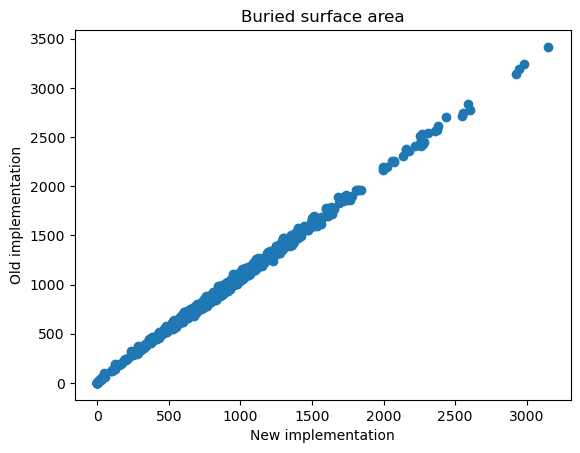

In [15]:
plt.scatter(joinedData["buried_area_x"], joinedData["buried_area_y"])
plt.xlabel("New implementation")
plt.ylabel("Old implementation")
plt.title("Buried surface area")
plt.show()

In [16]:
print("Salt bridges")
print("(Difference is expected as the original ISS code only considered acidic in chain 1 and basic in chain2)")
# That one is ok, as there was an error in the original ISS code
column = "salt_bridges"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Salt bridges
(Difference is expected as the original ISS code only considered acidic in chain 1 and basic in chain2)


,structure_name,file,salt_bridges_x,salt_bridges_y
9,DEG_COP1_1_5IGO,ranked_4.pdb,2,0
10,DEG_Kelch_Keap1_1_2FLU,ranked_0.pdb,11,0
11,DEG_Kelch_Keap1_1_2FLU,ranked_1.pdb,9,0
12,DEG_Kelch_Keap1_1_2FLU,ranked_2.pdb,11,0
13,DEG_Kelch_Keap1_1_2FLU,ranked_3.pdb,9,0
...,...,...,...,...
1325,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_3.pdb,1,0
1327,TRG_NES_CRM1_1_3GB8,ranked_0.pdb,5,0
1328,TRG_NES_CRM1_1_3GB8,ranked_1.pdb,3,0
1329,TRG_NES_CRM1_1_3GB8,ranked_2.pdb,4,0


In [17]:
print("Salt bridges, but smaller previous values are filtered")
column = "salt_bridges"
divergingRows = joinedData.query(f"({column}_x - {column}_y) < 0")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Salt bridges, but smaller previous values are filtered


,structure_name,file,salt_bridges_x,salt_bridges_y


In [18]:
print("interface distance")
print("Note: NaN values means a distance greater cutoff, which was previously equal to 0")
print("This table will consider x = NaN for any x")
column = "min_distance"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

interface distance
Note: NaN values means a distance greater cutoff, which was previously equal to 0
This table will consider x = NaN for any x


,structure_name,file,min_distance_x,min_distance_y


In [19]:
print("interface distance with NaN values")
print("Note: NaN values means a distance greater cutoff, which was previously equal to 0")
print("This table will consider x = NaN only for x>0")
column = "min_distance"
divergingRows = joinedData.query(f"({column}_x.isnull()) and {column}_y > 0")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

interface distance with NaN values
Note: NaN values means a distance greater cutoff, which was previously equal to 0
This table will consider x = NaN only for x>0


,structure_name,file,min_distance_x,min_distance_y
335,LIG_HOMEOBOX_1B72,ranked_0.pdb,NaN,12.319908
337,LIG_HOMEOBOX_1B72,ranked_2.pdb,NaN,14.745695
338,LIG_HOMEOBOX_1B72,ranked_3.pdb,NaN,10.803395
665,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,ranked_3.pdb,NaN,10.045623
711,MDOC_MAPK_JIP1_4_4H3B.DLIG_PAM2_1_1JGN,ranked_4.pdb,NaN,11.678234
785,MLIG_AP2alpha_1_1KY7.DLIG_PAM2_1_1JGN,ranked_3.pdb,NaN,10.408350
901,MLIG_EH1_1_2CE8.DLIG_SH3_CIN85_PxpxPR_1_2BZ8,ranked_4.pdb,NaN,11.388299
956,MLIG_IBAR_NPY_1_2YKT.DLIG_UFM1_UFIM_1_5HKH,ranked_4.pdb,NaN,13.261061
1032,MLIG_NRP_CendR_1_2ORZ.DLIG_KLC1_Yacidic_2_6FUZ,ranked_0.pdb,NaN,10.670957


In [20]:
print("Hydrophic interactions")
column = "hydrophobic_interactions"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Hydrophic interactions


,structure_name,file,hydrophobic_interactions_x,hydrophobic_interactions_y


### Analysis of interface

In [9]:
import biotite.structure as struc



In [60]:
chains = struc.get_chains(atomarray_biotite)
assert len(chains) == 2

chain1 = atomarray_biotite[atomarray_biotite.chain_id == chains[0]]
chain2 = atomarray_biotite[atomarray_biotite.chain_id == chains[1]]

print(atomarray_biotite.shape, chain1.shape, chain2.shape)

(4362,) (4281,) (81,)


In [63]:
atomarray_biotite

array([
	Atom(np.array([ -5.626, -16.59 ,  14.452], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="N", element="N"),
	Atom(np.array([ -5.563, -16.075,  15.318], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="H", element="H"),
	Atom(np.array([ -6.39 , -16.197,  13.922], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="H2", element="H"),
	Atom(np.array([ -5.81 , -17.566,  14.633], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="H3", element="H"),
	Atom(np.array([ -4.374, -16.419,  13.686], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([ -3.531, -16.827,  14.243], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="GLY", hetero=False, atom_name="HA2", element="H"),
	Atom(np.array([ -4.465, -16.916,  12.721], dtype=f

In [64]:
struc.get_residue_count(chain2)

6

In [72]:
#bonds = struc.connect_via_residue_names(atomarray_biotite)
#matrix = bonds.adjacency_matrix()

chain1_len = struc.get_residue_count(chain1)
res_matrix = np.full(shape=(struc.get_residue_count(atomarray_biotite), struc.get_residue_count(atomarray_biotite)), fill_value=False)
for x in range(atomarray_biotite.shape[0]):
    for y in range(atomarray_biotite.shape[0]):
        if struc.distance(atomarray_biotite[x].coord, atomarray_biotite[y].coord) > 5:
            continue
        x_res = atomarray_biotite[x].res_id - 1 + chain1_len*(0 if atomarray_biotite[x].chain_id == "A" else 1)
        y_res = atomarray_biotite[y].res_id - 1 + chain1_len*(0 if atomarray_biotite[y].chain_id == "A" else 1)
        res_matrix[x_res, y_res] = True

print(np.count_nonzero(res_matrix))
print(res_matrix.shape)



plt.imshow(res_matrix)

plt.show()

KeyboardInterrupt: 

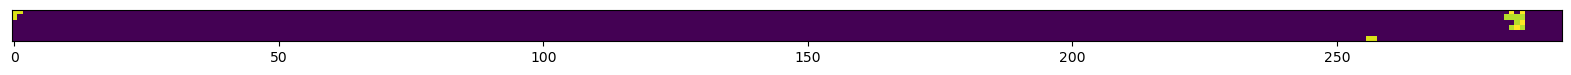

(1, 293)


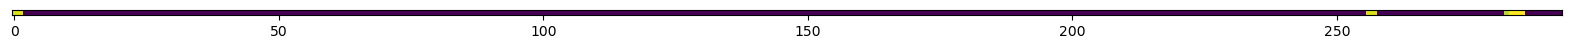

In [29]:
chains = struc.get_chains(atomarray_biotite)
assert len(chains) == 2

chain1 = atomarray_biotite[atomarray_biotite.chain_id == chains[0]]
chain2 = atomarray_biotite[atomarray_biotite.chain_id == chains[1]]


matrix = np.full(shape=(struc.get_residue_count(chain1), struc.get_residue_count(chain2)), fill_value=-20)
for i1, res1 in enumerate(chain1[chain1.atom_name == "CA"]):
    for i2, res2 in enumerate(chain2[chain2.atom_name == "CA"]):
        if (dist := struc.distance(res1, res2)) > 10:
            continue
        for a1 in chain1[chain1.res_id == res1.res_id]:
            for a2 in chain2[chain2.res_id == res2.res_id]:
                dist = min(dist, struc.distance(a1.coord, a2.coord))
        if dist < 5:
            matrix[i1, i2] = -dist
matrix = matrix.transpose()
plt.figure(figsize=(20,2))
plt.axes().get_yaxis().set_visible(False)
plt.imshow(matrix)
plt.show()

inf_res = np.max(matrix, axis=0)
inf_res = np.expand_dims(inf_res, axis=0)
print(inf_res.shape)
plt.figure(figsize=(20,2))
plt.axes().get_yaxis().set_visible(False)
plt.imshow(inf_res)
plt.show()

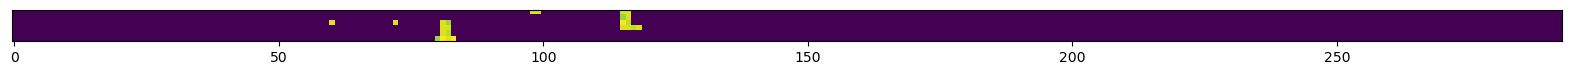

(1, 293)


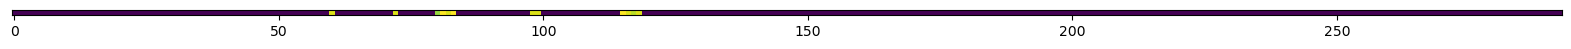

In [30]:
chains = struc.get_chains(solved_biotite)
assert len(chains) == 2

chain1 = solved_biotite[solved_biotite.chain_id == chains[0]]
chain2 = solved_biotite[solved_biotite.chain_id == chains[1]]


matrix = np.full(shape=(struc.get_residue_count(chain1), struc.get_residue_count(chain2)), fill_value=-20)
for i1, res1 in enumerate(chain1[chain1.atom_name == "CA"]):
    for i2, res2 in enumerate(chain2[chain2.atom_name == "CA"]):
        if (dist := struc.distance(res1, res2)) > 10:
            continue
        for a1 in chain1[chain1.res_id == res1.res_id]:
            for a2 in chain2[chain2.res_id == res2.res_id]:
                dist = min(dist, struc.distance(a1.coord, a2.coord))
        if dist < 5:
            matrix[i1, i2] = -dist
matrix = matrix.transpose()
plt.figure(figsize=(20,2))
plt.axes().get_yaxis().set_visible(False)
plt.imshow(matrix)
plt.show()

inf_res = np.max(matrix, axis=0)
inf_res = np.expand_dims(inf_res, axis=0)
print(inf_res.shape)
plt.figure(figsize=(20,2))
plt.axes().get_yaxis().set_visible(False)
plt.imshow(inf_res)
plt.show()